<a href="https://colab.research.google.com/github/tigerak/1st_practice/blob/main/Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

다음 분기에 어떤 게임을 설계해야 할까

를 정하는 과정과 그 결과를 보여주는 것이 목표입니다.

데이터셋을 읽는 것 부터,

이러한 게임을 만들어야 한다는 결론까지 의 과정을 colab을 사용하여 작성하고,

해당 내용을 기반으로 설명하는 영상을 작성하는 것이

허영범님이 이번 프로젝트 기간 동안 하셔야 하는 일입니다.

당연히 어떠한 코드, 분석, 라이브러리 혹은 목표를 가지는지는 온전히 허영범님의 자유입니다.

그러나, Section 1 Project 인 만큼 해당 기간 동안 배운 내용을 위주로 설정하는 것이 권장됩니다.

아직 배우지 않은 Deep Learning을 사용하면 곤란하겠죠?

추가로, 허영범님의 발표를 듣는 사람은 비데이터 직군이라 가정합니다.

즉 허영범님의 생각이나 가정들을 설명하는 과정에서 최대한 배경지식이 없는 사람들도 이해할 수 있도록 노력하셔야 할 겁니다.

- Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
- Sprint 2 : Hypothesis Test, CI, Bayesian
- Sprint 3 : DR, PCA, Cluster

발표영상의 시간은 5분으로 제한합니다.

발표영상 촬영 방법은 다른 문서를 참조하세요.

가능한 코드에 커멘트를 달아주는 것이 권장되지만, 모든 코드 내용을 한줄 한줄 설명할 필요는 없습니다.

단, 내가 이런 분석을 했는데 이 부분은 꼭 설명하고 싶다, 라는 내용이 있으면 설명해도 좋습니다.

# 데이터 다운로드

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [ ]:
raw_df = pd.read_csv('/content/vgames2.csv')

In [ ]:
raw_df = raw_df.drop(columns='Unnamed: 0')

In [ ]:
raw_df = raw_df.rename(columns={'NA_Sales' : 'NA', 
                                'EU_Sales' : 'EU',
                                'JP_Sales' : 'JP', 
                                'Other_Sales' : 'Other'
                                })

In [ ]:
raw_df.groupby(['Year']).count().tail(10)
# 2015년 이후의 자료는 수가 부족하므로 2015년까지만 사용할 예정

,Name,Platform,Genre,Publisher,NA,EU,JP,Other
Year,,,,,,,,
2009.0,1421,1421,1418,1421,1421,1421,1421,1421
2010.0,1252,1252,1248,1250,1252,1252,1252,1252
2011.0,1129,1129,1126,1126,1129,1129,1129,1129
2012.0,655,655,652,653,655,655,655,655
2013.0,544,544,543,544,544,544,544,544
2014.0,580,580,580,578,580,580,580,580
2015.0,609,609,606,609,609,609,609,609
2016.0,339,339,339,337,339,339,339,339
2017.0,3,3,3,3,3,3,3,3


In [ ]:
raw_df.isna().sum()

Name           0
Platform       0
Year         271
Genre         50
Publisher     58
NA             0
EU             0
JP             0
Other          0
dtype: int64

# 데이터 전처리

In [ ]:
# Year 결측치 70 처리 및 4자리 년도로 통일
raw_df['Year'] = raw_df['Year'].fillna(70)

In [ ]:
year=[]
for date in raw_df['Year']:
    tmp = date
    if date < 100 and date > 80:
        tmp = '19' + str(date)
    elif date < 100 and date < 10:
        tmp = '200' + str(date)
    elif date >= 0 and date < 21:
        tmp = '20' + str(date)
    else :
        tmp = str(date)
    
    tmp = tmp.split('.')
    tmp = int(tmp[0])
    year.append(tmp)

raw_df['Year'] = year

In [ ]:
# 지역별 판매액 K및 M 처리

def Str_to_Float(x):
    tmp = str(x)
    if tmp.endswith('K') == True:
        tmp = tmp.replace('K','')
        tmp = float(tmp) * 1000
    elif tmp.endswith('M') == True:
        tmp = tmp.replace('M','')
        tmp = float(tmp) * 1000000
    else :
        tmp = float(tmp) * 1000000 
        # 데이터 분석 결과 K앞의 수는 큰 수, 나머지는 상대적으로 작은 수
        # 따라서 표시가 없는 수는 M으로 통일
    return tmp

In [ ]:
cols = ['NA', 'EU', 'JP', 'Other']

for col in cols:
    for i in range(len(raw_df[col])):
        raw_df[col][i] = Str_to_Float(raw_df[col][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


앞서서 여러분에게 최대한의 자유를 드린다고 했지만, 그래도 발표에 반드시 포함되어야 하는 내용은 다음과 같습니다.

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

위 3가지 내용과 여러분들의 개인적인 분석 목표, 질문을 더하여 프로젝트를 완성하세요.

In [ ]:
# 추가 !! 지역별 플랫폼 연도별 플랫폼 
# 지역별 인기와 제조사의 관계

# 1. 지역에 따라 선호하는 게임 장르가 다를까?

## 지역에 따른 장르별 판매량

In [ ]:
regional = raw_df.copy()

In [ ]:
regional = regional[['Genre', 'NA', 'EU', 'JP', 'Other']]

In [ ]:
regional_melt = regional.melt(id_vars='Genre', value_vars=cols)

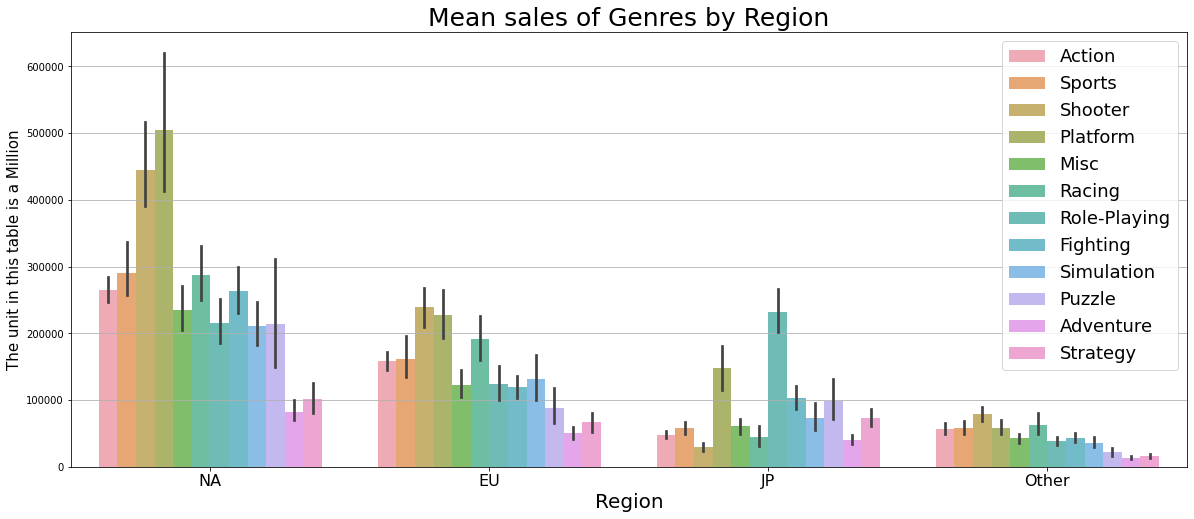

In [ ]:
plt.figure(figsize=(20, 8))

plt.title('Mean sales of Genres by Region', fontsize='25')
sns.barplot(x=regional_melt['variable'], y=regional_melt['value'], 
            hue=regional_melt['Genre'], alpha=0.8, ci=95,
            hue_order=['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 
                       'Racing', 'Role-Playing', 'Fighting', 'Simulation',
                       'Puzzle', 'Adventure', 'Strategy'])
plt.xticks(fontsize='16')
plt.xlabel('Region', size='20')
plt.ylabel('The unit in this table is a Million', size='15')
plt.legend(fontsize='18')
plt.grid(axis='y')

- 주의! 장르별 선호도를 보여주는 표가 아님!
- 신뢰도 그래프는 판매량 편차를 알 수 있음
- 액션은 대체적으로 적은 편차를 나타냄

In [ ]:
regional_genre = regional.groupby('Genre').sum()

In [ ]:
regional_genre = regional_genre.reset_index(drop=False)

In [ ]:
regional_genre = regional_genre.melt(id_vars='Genre', 
                                     value_vars=cols)

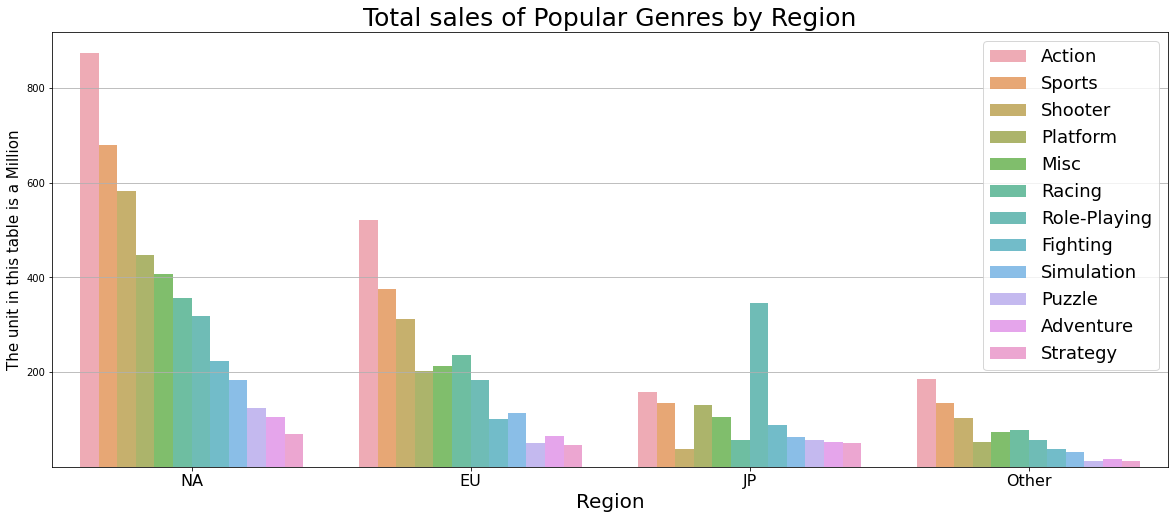

In [ ]:
plt.figure(figsize=(20, 8))

plt.title('Total sales of Popular Genres by Region', fontsize='25')
sns.barplot(x=regional_genre['variable'], y=regional_genre['value'], 
            hue=regional_genre['Genre'], alpha=0.8,  
            hue_order=['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 
                       'Racing', 'Role-Playing', 'Fighting', 'Simulation',
                       'Puzzle', 'Adventure', 'Strategy'])
plt.xticks(fontsize='16')
plt.yticks([200000000, 400000000, 600000000, 800000000], 
           ['200', '400', '600', '800'], fontsize='10')
plt.xlabel('Region', size='20')
plt.ylabel('The unit in this table is a Million', size='15')
plt.legend(fontsize='18')
plt.grid(axis='y')

북아메리카
- 액션 장르에 대한 선호도가 가장 높다.
- 스포츠와 슈팅 뒤를 이어 높은 판내량을 보이고 있다
- 전체적으로 역동적이고 빠른 전개를 좋아한다
- 다른 표를 보고 마저 정리하자

유럽
- 북아메리카와 비슷하게 액션의 선호가 가장 높다
- 스포츠와 슈팅 게임 역시 북아메리카와 비슷한 비율로 많은 판매량을 보인다 
- 역시 다른 표를 보고 조합하자

일본
- 높은 비율로 롤플레잉 게임을 선호한다.
- 일본 진출 계획이라면 일본에 맞는 특별한 게임 전략을 세워야한다.

기타
- 기타의 나라 역시 액션과 스포츠, 슈팅 게임이 순서대로 인기를 얻고있다.
- 역시 다른 표를 좀 더 보자

공통 : 최신의 경향성과 부합하는가???

## 최근 5년 지역에 따른 장르별 판매량

In [ ]:
years = pd.concat([raw_df['Year'], regional], axis=1)

In [ ]:
for i in range(len(years['Year'])):
    years.loc[i, 'Total_Sales'] = sum(years.loc[i, cols])

In [ ]:
# years = years.drop(columns=['NA', 'EU', 'JP', 'Other'])

In [ ]:
# years.groupby(['Year', 'Genre']).count().tail(30)

In [ ]:
years_10 = years.copy()

In [ ]:
drop_list=[]
for i, date in enumerate(years_10['Year']):
    if date < 2010 or date >2015:
        drop_list.append(i)

In [ ]:
years_10 = years_10.drop(index=drop_list)

In [ ]:
years_10 = years_10.melt(id_vars='Genre', value_vars=cols)

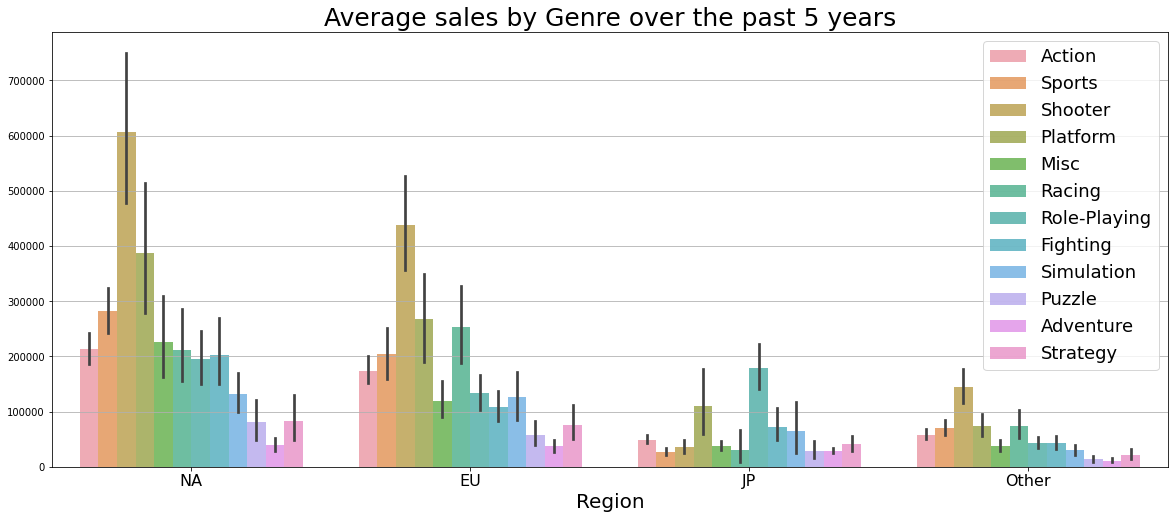

In [ ]:
plt.figure(figsize=(20, 8))

plt.title('Average sales by Genre over the past 5 years', fontsize='25')
sns.barplot(x=years_10['variable'], y=years_10['value'], hue=years_10['Genre'], 
            alpha=0.8, ci=95, 
            order=['NA', 'EU', 'JP', 'Other'],
            hue_order=['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 
                       'Racing', 'Role-Playing', 'Fighting', 'Simulation',
                       'Puzzle', 'Adventure', 'Strategy'])
plt.xticks(fontsize='16')
plt.xlabel('Region', size='20')
plt.ylabel(None)
plt.legend(fontsize='18')
plt.grid(axis='y')

- 액션은 적은 편차, 슈터는 높은 평균을 보이지만 편차 또한 커서 위험성이 높다

In [ ]:
years_10 = years_10.groupby(['variable', 'Genre']).sum()

In [ ]:
years_10 = years_10.reset_index()

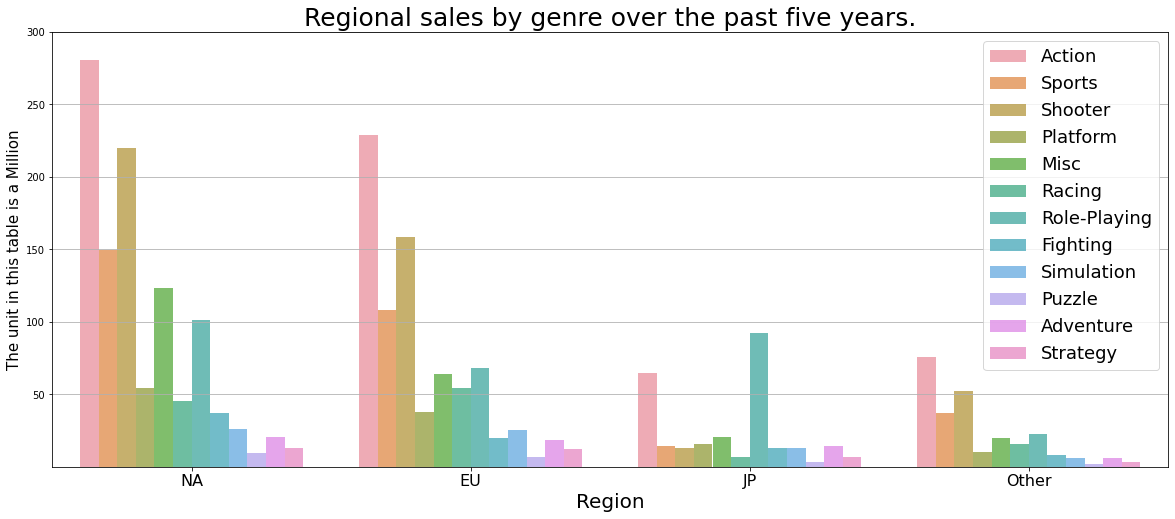

In [ ]:
plt.figure(figsize=(20, 8))

plt.title('Regional sales by genre over the past five years.', fontsize='25')
sns.barplot(x=years_10['variable'], y=years_10['value'], hue=years_10['Genre'], 
            alpha=0.8, order=['NA', 'EU', 'JP', 'Other'],
            hue_order=['Action', 'Sports', 'Shooter', 'Platform', 'Misc', 
                       'Racing', 'Role-Playing', 'Fighting', 'Simulation',
                       'Puzzle', 'Adventure', 'Strategy'])
plt.xticks(fontsize='16')
plt.yticks([50000000, 100000000, 150000000, 200000000, 250000000 ,300000000], 
           ['50', '100', '150', '200', '250', '300'], fontsize='10')
plt.xlabel('Region', size='20')
plt.ylabel('The unit in this table is a Million', size='15')
plt.legend(fontsize='18')
plt.grid(axis='y')

- 세계적으로 액션 장르에 대한 선호도가 높음
- wii sports가 빠지면서 스포츠 장르는 선호도가 많이 낮아짐

# 2. 연도별 게임의 트렌드가 있을까?

In [ ]:
for i, year in enumerate(years['Year']):
    if year == 70:
        years = years.drop(index=[i])

In [ ]:
years_group = years.groupby(['Year', 'Genre']).sum()

In [ ]:
years_group = years_group.reset_index(drop=False)

## 장르별 연간 판매량 

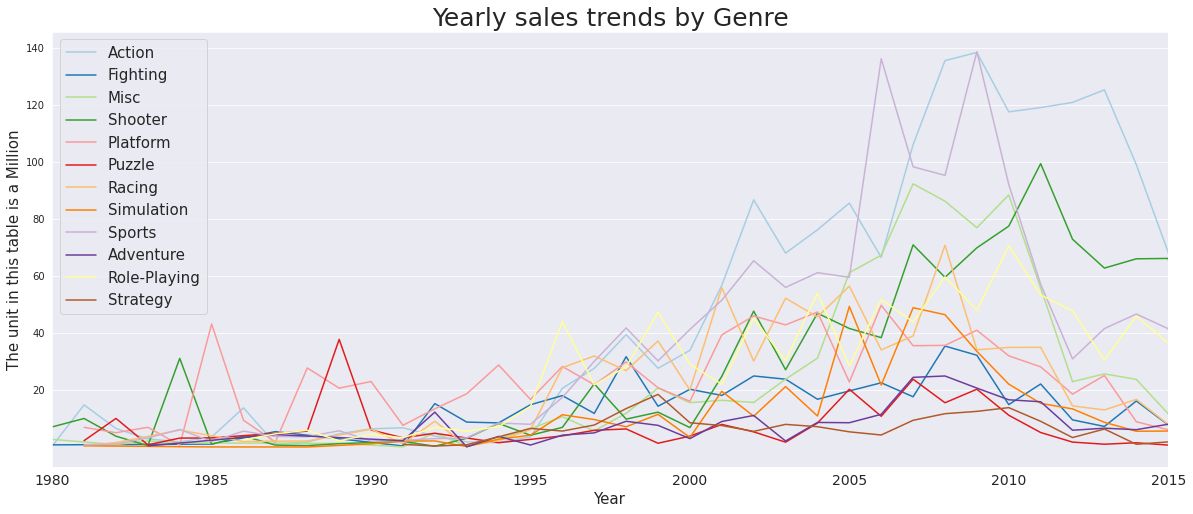

In [ ]:
plt.figure(figsize=(20, 8))
sns.set_style("dark")
plt.title('Yearly sales trends by Genre', fontsize='25')
sns.color_palette("Paired")
sns.lineplot(x=years_group['Year'], y=years_group['Total_Sales'], hue=years_group['Genre'], 
             ci=None, palette="Paired")
plt.xticks(fontsize='14')
plt.yticks([20000000, 40000000, 60000000, 80000000, 100000000, 120000000, 140000000], 
           ['20', '40', '60', '80', '100', '120' ,'140'], fontsize='10')
plt.xlabel('Year', size='15')
plt.ylabel('The unit in this table is a Million', size='15')
plt.xlim(1980, 2015)
plt.legend(fontsize='15')
plt.grid(axis='y')

- 80년대에는 전통적인 오락실 게임인 Shooter와 Platform이 대세였다
- 2000년대에 들어오면서 Action과 Sports 게임이 눈에 띄게 성장했다.
- Shooter 게임도 지속적인 성장세를 보이고 있다.

## 연도별 장르 T-Test

In [ ]:
year_y = years.sort_values(['Year'], ascending=[True])

In [ ]:
year_y = year_y.dropna()

In [ ]:
year_y = year_y.reset_index(drop=False)

In [ ]:
genre_unique = year_y['Genre'].unique()
year_unique = year_y['Year'].unique()

year_list = []
for i in range(39):
    year = []
    for j in range(12):
        genre = [0]
        year.append(genre)
    year_list.append(year)

In [ ]:
for i, year in enumerate(year_y['Year']):
    for a, standard in enumerate(year_unique):
        if year == standard:
            for j, genre in enumerate(genre_unique) :
               if year_y['Genre'][i] == genre:
                    year_list[a][j].append(year_y['Total_Sales'][i])

In [ ]:
year_list = pd.DataFrame(year_list)

In [ ]:
year_list = year_list.rename(columns={0 : 'g'})

In [ ]:
year_unique = pd.DataFrame(year_unique.T)

In [ ]:
year_list = pd.concat([year_unique, year_list], axis=1)

In [ ]:
year_list = year_list.rename(columns={0 : 'Year',
                                      'g' : 0})

In [ ]:
for i in range(39):
    fvalue, pvalue = stats.f_oneway(year_list.loc[i, 0], year_list.loc[i, 1], year_list.loc[i, 2],
                                    year_list.loc[i, 3], year_list.loc[i, 4], year_list.loc[i, 5],
                                    year_list.loc[i, 6], year_list.loc[i, 7], year_list.loc[i, 8],
                                    year_list.loc[i, 9], year_list.loc[i, 10], year_list.loc[i, 11])
    if pvalue < 0.05:
        print('{}년의 장르별 상관계수 :'.format(year_list['Year'][i]), round(fvalue, 2), '독립성 지수 - ', pvalue)

1994년의 장르별 상관계수 : 3.84 독립성 지수 -  9.285092462342633e-05
1995년의 장르별 상관계수 : 2.67 독립성 지수 -  0.0030783145999560006
2000년의 장르별 상관계수 : 1.9 독립성 지수 -  0.03868637514699771
2002년의 장르별 상관계수 : 2.09 독립성 지수 -  0.018661404074277424
2007년의 장르별 상관계수 : 2.03 독립성 지수 -  0.02247846486147655
2008년의 장르별 상관계수 : 2.67 독립성 지수 -  0.002169976116451376
2009년의 장르별 상관계수 : 3.04 독립성 지수 -  0.0004864017080416477
2010년의 장르별 상관계수 : 3.6 독립성 지수 -  5.091104781414008e-05
2011년의 장르별 상관계수 : 4.54 독립성 지수 -  9.093316673441241e-07
2012년의 장르별 상관계수 : 4.17 독립성 지수 -  5.629894135592062e-06
2014년의 장르별 상관계수 : 3.84 독립성 지수 -  2.3021690276197057e-05
2015년의 장르별 상관계수 : 8.52 독립성 지수 -  4.4418277286254515e-14
2016년의 장르별 상관계수 : 3.12 독립성 지수 -  0.0004963133805931995


## 장르별 최근 10년 판매량

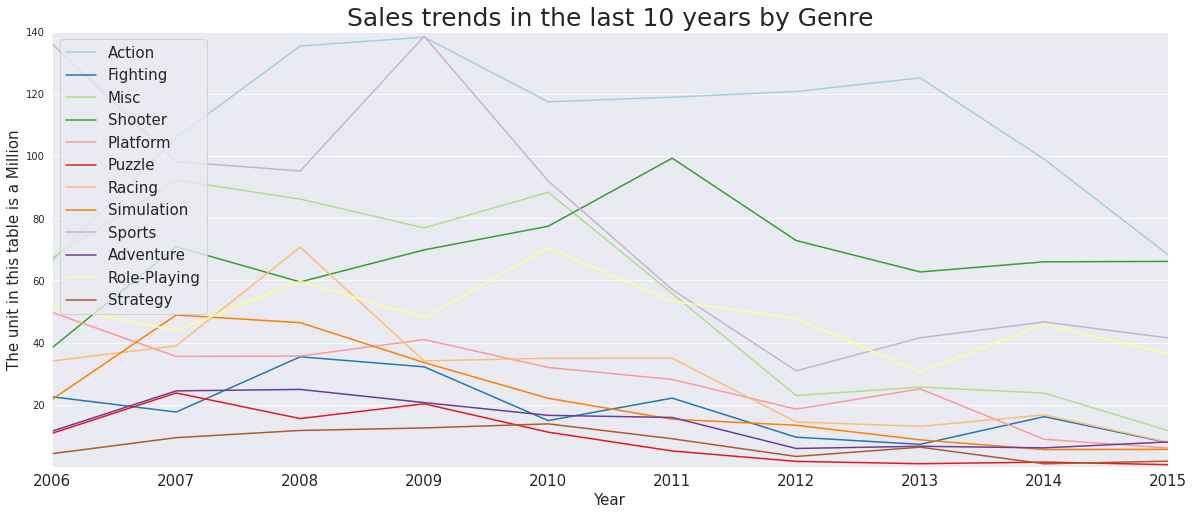

In [ ]:
plt.figure(figsize=(20, 8))
sns.set_style("dark")
plt.title('Sales trends in the last 10 years by Genre', fontsize='25')
sns.color_palette("Paired")
sns.lineplot(x=years_group['Year'], y=years_group['Total_Sales'], hue=years_group['Genre'], 
             ci=None, palette="Paired")
plt.xticks(fontsize='15')
plt.yticks([20000000, 40000000, 60000000, 80000000, 100000000, 120000000, 140000000], 
           ['20', '40', '60', '80', '100', '120' ,'140'], fontsize='10')
plt.xlabel('Year', size='15')
plt.ylabel('The unit in this table is a Million', size='15')
plt.xlim(2006, 2015)
plt.ylim(0, 140000000)
plt.legend(loc=2, fontsize='15')
plt.grid(axis='y')

### 각 장르별 시장 지배율

In [ ]:
total_sum = years.groupby('Year').sum()

In [ ]:
total_group = years.groupby(['Year', 'Genre']).sum()

In [ ]:
total_group = total_group.reset_index()

In [ ]:
total_sum = total_sum.reset_index()

In [ ]:
genre_rate = pd.DataFrame()

In [ ]:
year = []
genr = []
rate = []

for i, date in enumerate(total_group['Year']):
    for a, standard in enumerate(total_sum['Year']):
        if date == standard :
            for j, plat in enumerate(total_group['Genre'].unique()):
                if total_group['Genre'][i] == plat:
                    print('{}년도 {}의 점유율 :'.format(date, total_group['Genre'][i]), 
                        round(((total_group['Total_Sales'][i] / total_sum['Total_Sales'][a]) * 100), 2), '%')
                    year.append(date)
                    genr.append(total_group['Genre'][i])
                    rate.append(round(((total_group['Total_Sales'][i] / total_sum['Total_Sales'][a]) * 100), 2))

1980년도 Action의 점유율 : 2.99 %
1980년도 Fighting의 점유율 : 6.77 %
1980년도 Misc의 점유율 : 23.73 %
1980년도 Shooter의 점유율 : 62.13 %
1981년도 Action의 점유율 : 41.45 %
1981년도 Platform의 점유율 : 19.39 %
1981년도 Puzzle의 점유율 : 6.31 %
1981년도 Racing의 점유율 : 1.35 %
1981년도 Shooter의 점유율 : 28.08 %
1981년도 Simulation의 점유율 : 1.23 %
1981년도 Sports의 점유율 : 2.19 %
1982년도 Action의 점유율 : 22.51 %
1982년도 Misc의 점유율 : 3.01 %
1982년도 Platform의 점유율 : 17.42 %
1982년도 Puzzle의 점유율 : 34.76 %
1982년도 Racing의 점유율 : 5.44 %
1982년도 Shooter의 점유율 : 13.19 %
1982년도 Sports의 점유율 : 3.67 %
1983년도 Action의 점유율 : 17.02 %
1983년도 Adventure의 점유율 : 2.38 %
1983년도 Misc의 점유율 : 12.74 %
1983년도 Platform의 점유율 : 41.25 %
1983년도 Puzzle의 점유율 : 4.64 %
1983년도 Shooter의 점유율 : 2.92 %
1983년도 Sports의 점유율 : 19.05 %
1984년도 Action의 점유율 : 3.67 %
1984년도 Misc의 점유율 : 2.88 %
1984년도 Platform의 점유율 : 1.37 %
1984년도 Puzzle의 점유율 : 6.24 %
1984년도 Racing의 점유율 : 11.82 %
1984년도 Shooter의 점유율 : 61.77 %
1984년도 Sports의 점유율 : 12.25 %
1985년도 Action의 점유율 : 6.52 %
1985년도 Fighting의 점유율 : 1.95 %
1985년도 Platform의

In [ ]:
genre_rate['Year'] = year
genre_rate['Genre'] = genr
genre_rate['Rate'] = rate

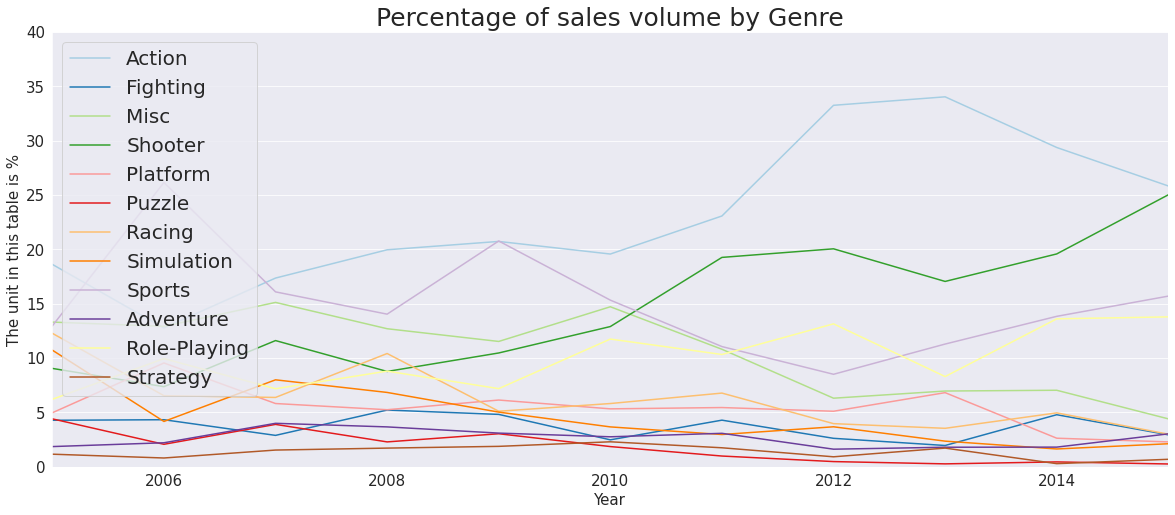

In [ ]:
plt.figure(figsize=(20, 8))
sns.set_style("dark")
plt.title('Percentage of sales volume by Genre', fontsize='25')
sns.color_palette("Paired")
sns.lineplot(x=genre_rate['Year'], y=genre_rate['Rate'], hue=genre_rate['Genre'],
             ci=None, palette="Paired")

plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xlabel('Year', size='15')
plt.ylabel('The unit in this table is %', size='15')
plt.xlim(2005, 2015)
plt.ylim(0, 40)
plt.legend(loc=2, fontsize='20')
plt.grid(axis='y')

- 특히 2010년 부터 2015년 까지는 확연한 차이로 Action과 Shooter의 높은 판매량을 확인할 수 있다

# 3. 플랫폼에도 트렌드가 있을까?

In [ ]:
sales = raw_df.copy()

In [ ]:
sales_10 = sales

In [ ]:
for i in range(len(sales['Year'])):
    sales.loc[i, 'Total_Sales'] = sum(sales.loc[i, cols])

## 전체연도 플랫폼별 판매량의 변화

In [ ]:
platform = pd.concat([raw_df, years['Total_Sales']], axis=1)

In [ ]:
platform = platform.groupby(['Year', 'Platform']).sum()

In [ ]:
platform = platform.reset_index()

In [ ]:
for i, year in enumerate(platform['Year']):
    if year == 70:
        platform = platform.drop(index=[i])

In [ ]:
platform = platform.reset_index(drop=True)

In [ ]:
platform

,Year,Platform,Total_Sales
0,1980,2600,11380000.0
1,1981,2600,35680000.0
2,1982,2600,28880000.0
3,1983,2600,5840000.0
4,1983,NES,10960000.0
...,...,...,...
236,2016,X360,830000.0
237,2016,XOne,12380000.0
238,2017,PS4,30000.0
239,2017,PSV,20000.0


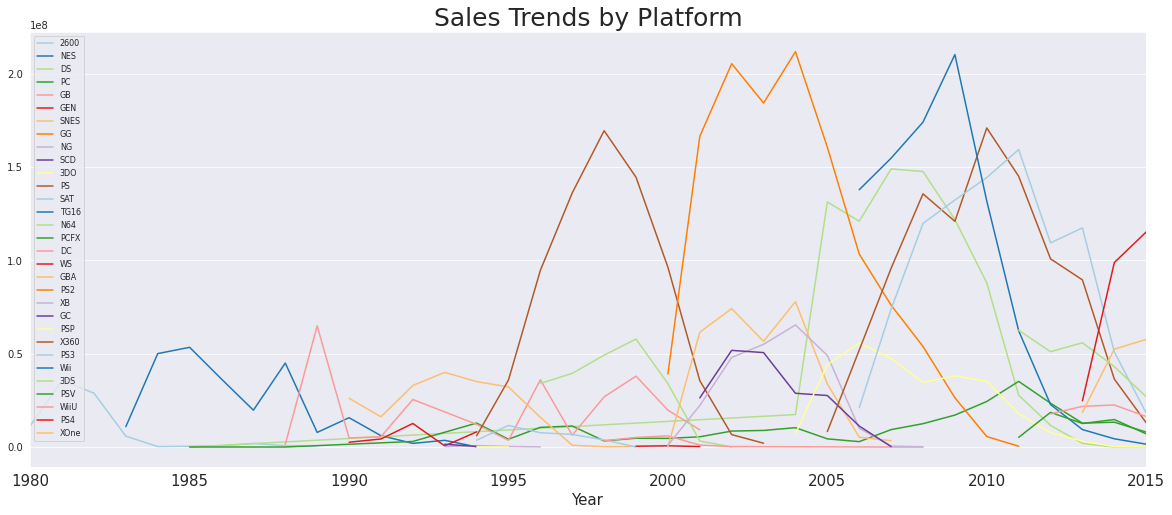

In [ ]:
plt.figure(figsize=(20, 8))
sns.set_style("dark")
plt.title('Sales Trends by Platform', fontsize='25')
sns.color_palette("Paired")
sns.lineplot(x=platform['Year'], y=platform['Total_Sales'], hue=platform['Platform'],
             ci=None, palette="Paired")

plt.xticks(fontsize='15')
plt.xlabel('Year', size='15')
plt.ylabel(None)
plt.xlim(1980, 2015)
plt.legend(loc=2, fontsize='8')
plt.grid(axis='y')

- 가족이 함께 즐기는 건강하고 활동적 이미지를 마케팅에 활용한 will 게임의 판매량은 특별히 눈에 띈다.
- 최근의 X-One와 PS4는 다양한 멀티미디어 기능과 X-Series PS-Series를 통해서 쌓아온 수 많은 종류의 게임들을 통해 전체적으로 높은 플랫폼 지배력을 보여주고 있다.

## 연도별 플랫폼 T-Test

In [ ]:
sales_t = sales.sort_values(['Year'], ascending=[True])

In [ ]:
platform_unique = sales_t['Platform'].unique()
year_unique = sales_t['Year'].unique()

In [ ]:
year_list = []
for i in range(year_unique.shape[0]):
    year = []
    for j in range(platform_unique.shape[0]):
        platform_zero = [0]
        year.append(platform_zero)
    year_list.append(year)

In [ ]:
sales_t = sales_t.reset_index(drop=True)

In [ ]:
for i, year in enumerate(sales_t['Year']):
    for a, standard in enumerate(year_unique):
        if year == standard:
            for j, platform_uni in enumerate(platform_unique) :
                if sales_t['Platform'][i] == platform_uni:
                    year_list[a][j].append(sales_t['Total_Sales'][i])

In [ ]:
year_list = pd.DataFrame(year_list)

In [ ]:
year_list = year_list.rename(columns={0 : 'g'})

In [ ]:
year_unique = pd.DataFrame(year_unique.T)

In [ ]:
year_list = pd.concat([year_unique, year_list], axis=1)

In [ ]:
year_list = year_list.rename(columns={0 : 'Year',
                                      'g' : 0})

In [ ]:
for i in range(year_unique.shape[0]):
    fvalue, pvalue = stats.f_oneway(year_list.loc[i, 0], year_list.loc[i, 1], year_list.loc[i, 2],
                                    year_list.loc[i, 3], year_list.loc[i, 4], year_list.loc[i, 5],
                                    year_list.loc[i, 6], year_list.loc[i, 7], year_list.loc[i, 8],
                                    year_list.loc[i, 9], year_list.loc[i, 10], year_list.loc[i, 11],
                                    year_list.loc[i, 12], year_list.loc[i, 13], year_list.loc[i, 14],
                                    year_list.loc[i, 15], year_list.loc[i, 16], year_list.loc[i, 17],
                                    year_list.loc[i, 18], year_list.loc[i, 19], year_list.loc[i, 20],
                                    year_list.loc[i, 21], year_list.loc[i, 22], year_list.loc[i, 23],
                                    year_list.loc[i, 24], year_list.loc[i, 25], year_list.loc[i, 26],
                                    year_list.loc[i, 27], year_list.loc[i, 28], year_list.loc[i, 29],
                                    year_list.loc[i, 30])
    if pvalue < 0.05:
        print('{}년의 플랫폼별 상관계수 :'.format(year_list['Year'][i]), round(fvalue, 2), '독립성 지수 - ', pvalue)

1994년의 플랫폼별 상관계수 : 1.57 독립성 지수 -  0.04606793275244018
1998년의 플랫폼별 상관계수 : 1.65 독립성 지수 -  0.01914500728638025
2003년의 플랫폼별 상관계수 : 1.96 독립성 지수 -  0.0017841969725464503
2007년의 플랫폼별 상관계수 : 1.49 독립성 지수 -  0.0434183080502302
2008년의 플랫폼별 상관계수 : 1.89 독립성 지수 -  0.0026250169004276226
2010년의 플랫폼별 상관계수 : 2.09 독립성 지수 -  0.0005356994102845587
2011년의 플랫폼별 상관계수 : 1.84 독립성 지수 -  0.003947508862787757
2014년의 플랫폼별 상관계수 : 1.95 독립성 지수 -  0.0019986716699542336
2015년의 플랫폼별 상관계수 : 1.84 독립성 지수 -  0.004628084379449625


## 최근 5년 플랫폼별 판매량의 변화

In [ ]:
platform_5 = platform.copy()

In [ ]:
drop_list=[]
for i, date in enumerate(platform_5['Year']):
    if date < 2010 or date >2015:
        drop_list.append(i)

platform_5 = platform_5.drop(index=drop_list)

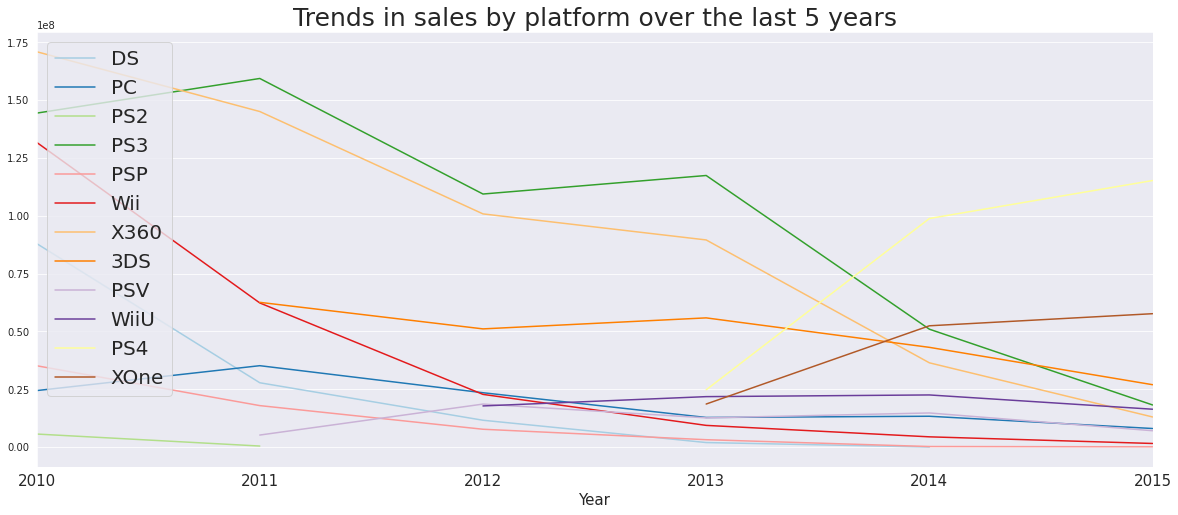

In [ ]:
plt.figure(figsize=(20, 8))
sns.set_style("dark")
plt.title('Trends in sales by platform over the last 5 years', fontsize='25')
sns.color_palette("Paired")
sns.lineplot(x=platform_5['Year'], y=platform_5['Total_Sales'], hue=platform_5['Platform'],
             ci=None, palette="Paired")

plt.xticks(fontsize='15')
plt.xlabel('Year', size='15')
plt.ylabel(None)
plt.xlim(2010, 2015)
plt.legend(loc=2, fontsize='20')
plt.grid(axis='y')

### 각 플랫폼별 시장 지배율

In [ ]:
total_sum = platform_5.groupby('Year').sum()

In [ ]:
total_group = platform_5.groupby(['Year', 'Platform']).sum()

In [ ]:
total_group = total_group.reset_index()

In [ ]:
total_sum = total_sum.reset_index()

In [ ]:
platform_rate = pd.DataFrame()

In [ ]:
year = []
platfor = []
rate = []

for i, date in enumerate(total_group['Year']):
    for a, standard in enumerate(total_sum['Year']):
        if date == standard :
            for j, plat in enumerate(total_group['Platform'].unique()):
                if total_group['Platform'][i] == plat:
                    print('{}년도 {}의 점유율 :'.format(date, total_group['Platform'][i]), 
                        round(((total_group['Total_Sales'][i] / total_sum['Total_Sales'][a]) * 100), 2), '%')
                    year.append(date)
                    platfor.append(total_group['Platform'][i])
                    rate.append(round(((total_group['Total_Sales'][i] / total_sum['Total_Sales'][a]) * 100), 2))

2010년도 DS의 점유율 : 14.66 %
2010년도 PC의 점유율 : 4.07 %
2010년도 PS2의 점유율 : 0.94 %
2010년도 PS3의 점유율 : 24.05 %
2010년도 PSP의 점유율 : 5.86 %
2010년도 Wii의 점유율 : 21.95 %
2010년도 X360의 점유율 : 28.47 %
2011년도 3DS의 점유율 : 12.13 %
2011년도 DS의 점유율 : 5.39 %
2011년도 PC의 점유율 : 6.82 %
2011년도 PS2의 점유율 : 0.09 %
2011년도 PS3의 점유율 : 30.89 %
2011년도 PSP의 점유율 : 3.48 %
2011년도 PSV의 점유율 : 1.01 %
2011년도 Wii의 점유율 : 12.08 %
2011년도 X360의 점유율 : 28.12 %
2012년도 3DS의 점유율 : 14.07 %
2012년도 DS의 점유율 : 3.19 %
2012년도 PC의 점유율 : 6.47 %
2012년도 PS3의 점유율 : 30.12 %
2012년도 PSP의 점유율 : 2.12 %
2012년도 PSV의 점유율 : 5.12 %
2012년도 Wii의 점유율 : 6.27 %
2012년도 WiiU의 점유율 : 4.9 %
2012년도 X360의 점유율 : 27.75 %
2013년도 3DS의 점유율 : 15.18 %
2013년도 DS의 점유율 : 0.53 %
2013년도 PC의 점유율 : 3.48 %
2013년도 PS3의 점유율 : 31.91 %
2013년도 PS4의 점유율 : 6.73 %
2013년도 PSP의 점유율 : 0.87 %
2013년도 PSV의 점유율 : 3.43 %
2013년도 Wii의 점유율 : 2.55 %
2013년도 WiiU의 점유율 : 5.93 %
2013년도 X360의 점유율 : 24.34 %
2013년도 XOne의 점유율 : 5.06 %
2014년도 3DS의 점유율 : 12.79 %
2014년도 DS의 점유율 : 0.01 %
2014년도 PC의 점유율 : 3.95 %
2014년도 PS3의 점유

In [ ]:
platform_rate['Year'] = year
platform_rate['Platform'] = platfor
platform_rate['Rate'] = rate

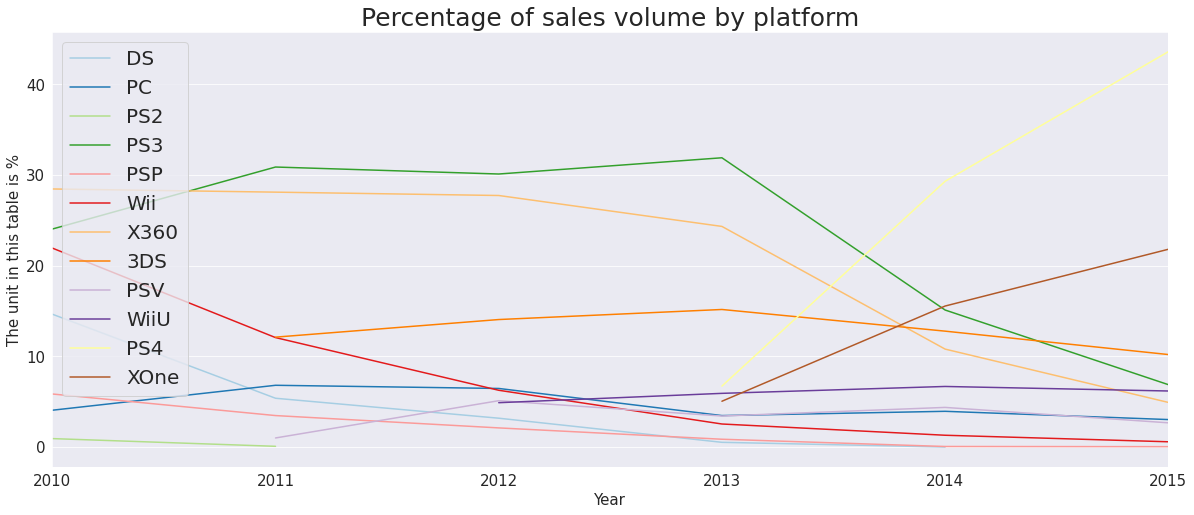

In [ ]:
plt.figure(figsize=(20, 8))
sns.set_style("dark")
plt.title('Percentage of sales volume by platform', fontsize='25')
sns.color_palette("Paired")
sns.lineplot(x=platform_rate['Year'], y=platform_rate['Rate'], hue=platform_rate['Platform'],
             ci=None, palette="Paired")

plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
plt.xlabel('Year', size='15')
plt.ylabel('The unit in this table is %', size='15')
plt.xlim(2010, 2015)
plt.legend(loc=2, fontsize='20')
plt.grid(axis='y')

# 4. 판매량이 높은 게임에 대한 분석 및 시각화

## 개별 게임의 판매량

No handles with labels found to put in legend.


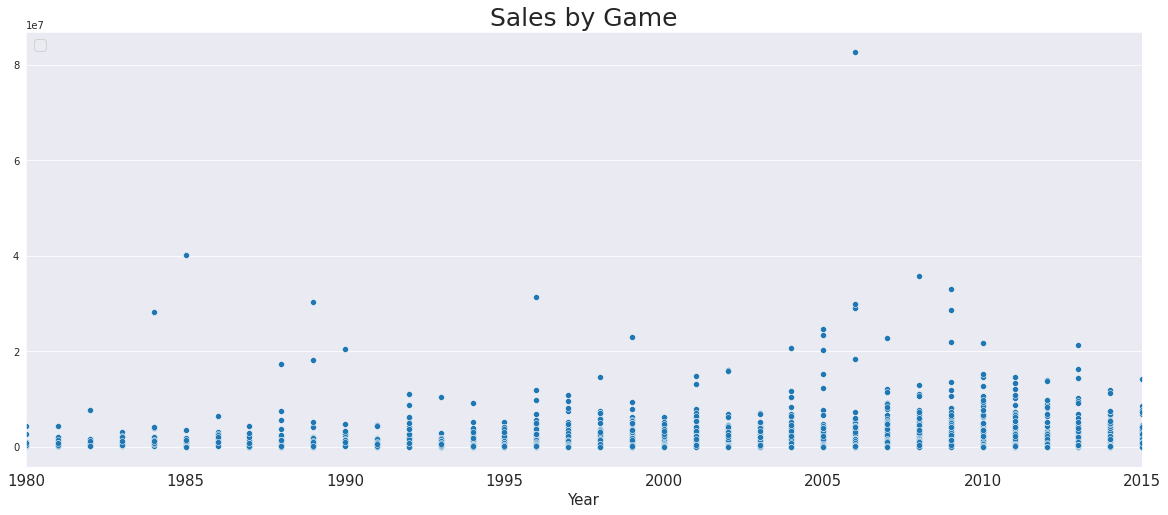

In [ ]:
plt.figure(figsize=(20, 8))
sns.set_style("dark")
plt.title('Sales by Game', fontsize='25')
sns.color_palette("Paired")
sns.scatterplot(x=sales['Year'], y=sales['Total_Sales'],
             ci=None, palette="Paired")

plt.xticks(fontsize='15')
plt.xlabel('Year', size='15')
plt.ylabel(None)
plt.xlim(1980, 2015)
plt.legend(loc=2, fontsize='15')
plt.grid(axis='y')

- 특정한 게임이 큰 수익을 거두는 경항이 강하지만

## 연도별 최고 판매 게임의 장르

In [ ]:
years_individual = pd.concat([raw_df['Year'], raw_df['Platform'], regional], axis=1)

In [ ]:
years_individual = years.groupby(['Year', 'Genre']).max()

In [ ]:
years_individual = years_individual.reset_index(drop=False)

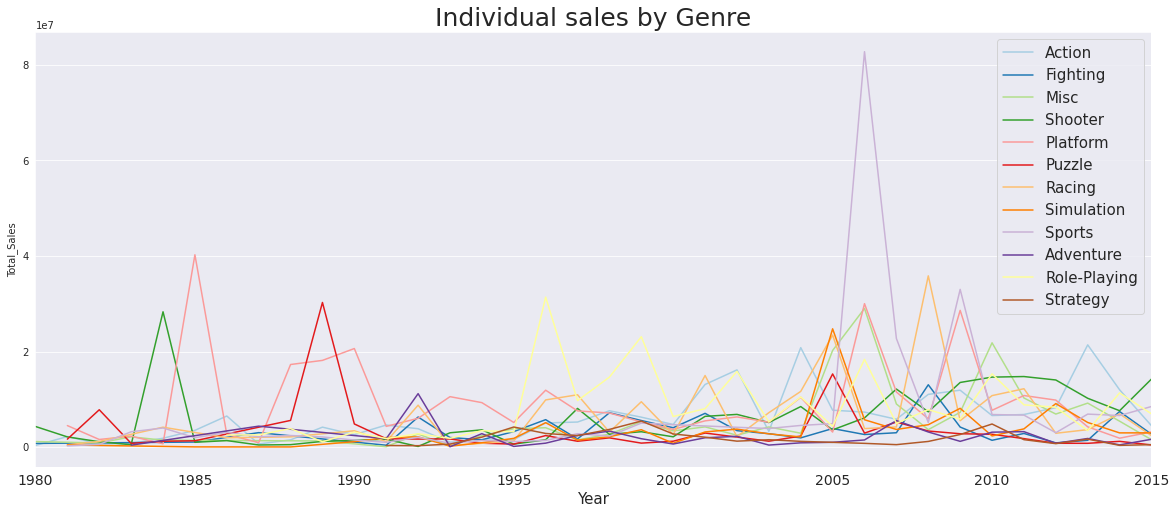

In [ ]:
plt.figure(figsize=(20, 8))
sns.set_style("dark")
plt.title('Individual sales by Genre', fontsize='25')
sns.color_palette("Paired")
sns.lineplot(x=years_individual['Year'], y=years_individual['Total_Sales'], hue=years_individual['Genre'], 
             ci=None, palette="Paired")
plt.xticks(fontsize='14')
plt.xlabel('Year', size='15')
plt.xlim(1980, 2015)
plt.legend(fontsize='15')
plt.grid(axis='y')

## 전체 연도 간 지역별 판매량 (높은 순)

In [ ]:
T = sales.sort_values(['Total_Sales'], ascending=[False])[:10]

- 특히 미국과 유럽에서 Will Sports의 판매량은 압도적이다

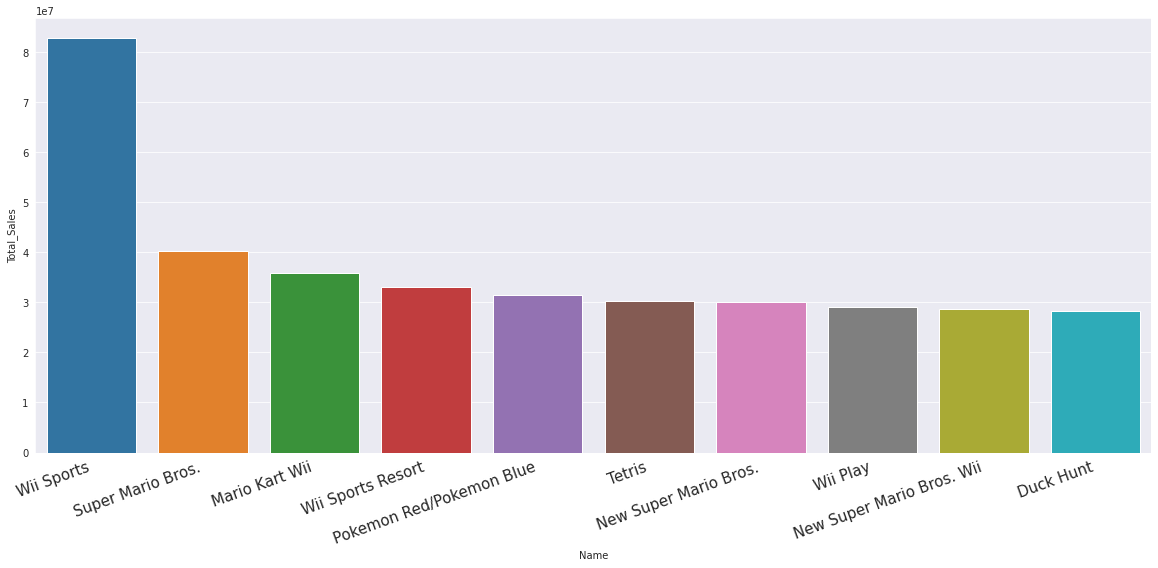

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x=T['Name'], y=T['Total_Sales'])
plt.xticks(fontsize='15', rotation=20, ha='right')
plt.grid(axis='y')

In [ ]:
T = T.melt(id_vars='Name', value_vars=cols)

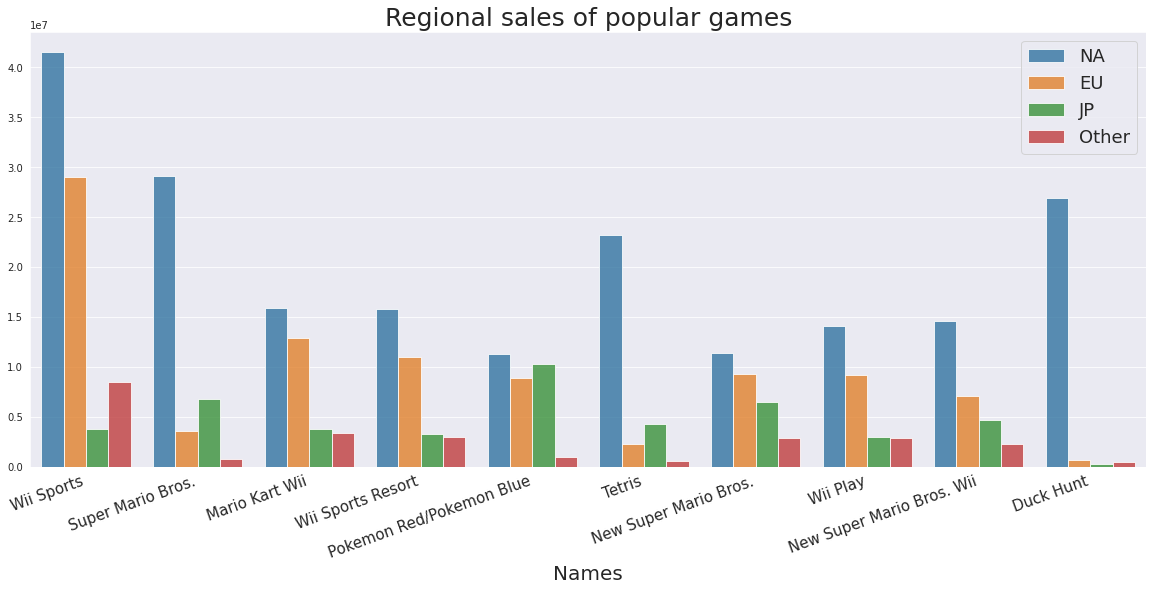

In [ ]:
plt.figure(figsize=(20, 8))

plt.title('Regional sales of popular games', fontsize='25')
sns.barplot(x=T['Name'], y=T['value'], hue=T['variable'], 
            alpha=0.8)
plt.xticks(fontsize='15', rotation=20, ha='right')
plt.xlabel('Names', size='20')
plt.ylabel(None)
plt.legend(fontsize='18')
plt.grid(axis='y')

In [ ]:
N = sales.sort_values([cols[0]], ascending=[False])[:10]

In [ ]:
N

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,4.149e+07,2.902e+07,3.77e+06,8.46e+06,82740000.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,2.908e+07,3.58e+06,6.81e+06,770000,40240000.0
10488,Duck Hunt,NES,1984,Shooter,Nintendo,2.693e+07,630000,280000,470000,28310000.0
1203,Tetris,GB,1989,Puzzle,Nintendo,2.32e+07,2.26e+06,4.22e+06,580000,30260000.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,1.585e+07,1.288e+07,3.79e+06,3.31e+06,35830000.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,1.575e+07,1.101e+07,3.28e+06,2.96e+06,33000000.0
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,1.497e+07,4.94e+06,240000,1.67e+06,21820000.0
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,1.459e+07,7.06e+06,4.7e+06,2.26e+06,28610000.0
3014,Wii Play,Wii,2006,Misc,Nintendo,1.403e+07,9.2e+06,2.93e+06,2.85e+06,29010000.0
13111,Super Mario World,SNES,1990,Platform,Nintendo,1.278e+07,3.75e+06,3.54e+06,550000,20620000.0


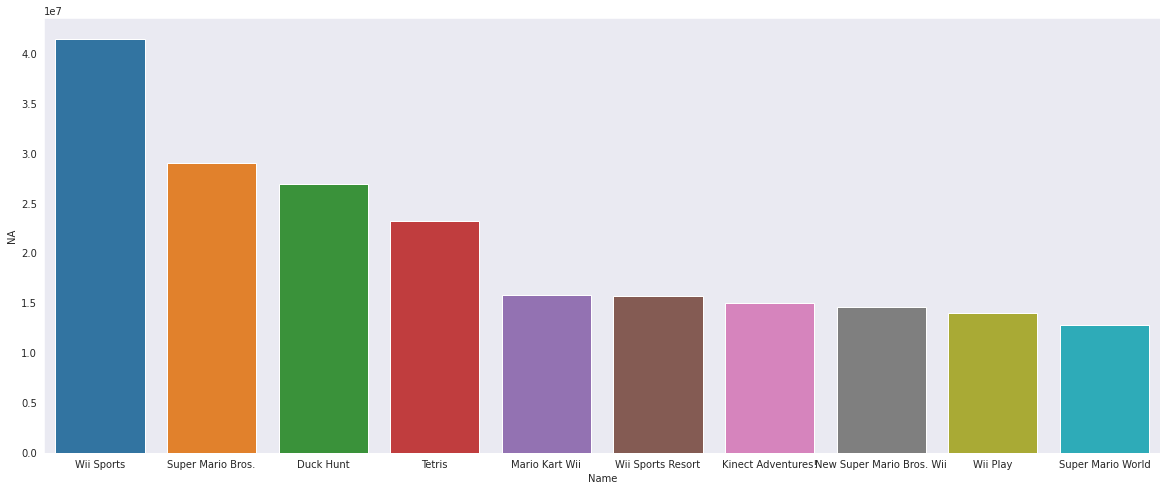

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x=N['Name'], y=N['NA'])

In [ ]:
sales.sort_values([cols[1]], ascending=[False])[:10]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,4.149e+07,2.902e+07,3.77e+06,8.46e+06,82740000.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,1.585e+07,1.288e+07,3.79e+06,3.31e+06,35830000.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,1.575e+07,1.101e+07,3.28e+06,2.96e+06,33000000.0
11137,Nintendogs,DS,2005,Simulation,Nintendo,9.07e+06,1.1e+07,1.93e+06,2.75e+06,24750000.0
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01e+06,9.27e+06,970000,4.14e+06,21390000.0
13229,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4.75e+06,9.26e+06,4.16e+06,2.05e+06,20220000.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,1.138e+07,9.23e+06,6.5e+06,2.9e+06,30010000.0
3014,Wii Play,Wii,2006,Misc,Nintendo,1.403e+07,9.2e+06,2.93e+06,2.85e+06,29010000.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1.127e+07,8.89e+06,1.022e+07,1e+06,31380000.0
10899,Wii Fit Plus,Wii,2009,Sports,Nintendo,9.09e+06,8.59e+06,2.53e+06,1.79e+06,22000000.0


In [ ]:
sales.sort_values([cols[2]], ascending=[False])[:10]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total_Sales
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,1.127e+07,8.89e+06,1.022e+07,1e+06,31380000.0
9416,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9e+06,6.18e+06,7.2e+06,710000,23090000.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,2.908e+07,3.58e+06,6.81e+06,770000,40240000.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,1.138e+07,9.23e+06,6.5e+06,2.9e+06,30010000.0
10555,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6.42e+06,4.52e+06,6.04e+06,1.37e+06,18350000.0
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57e+06,3.28e+06,5.65e+06,820000,15320000.0
10917,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6.06e+06,3.9e+06,5.38e+06,500000,15840000.0
3273,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2.55e+06,3.52e+06,5.33e+06,880000,12280000.0
511,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3.44e+06,5.36e+06,5.32e+06,1.18e+06,15300000.0
1847,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0,0,4.87e+06,0,4870000.0


In [ ]:
sales.sort_values([cols[3]], ascending=[False])[:10]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total_Sales
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43e+06,400000,410000,1.057e+07,20810000.0
2908,Wii Sports,Wii,2006,Sports,Nintendo,4.149e+07,2.902e+07,3.77e+06,8.46e+06,82740000.0
14665,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01e+06,10000,1.1e+06,7.53e+06,11650000.0
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01e+06,9.27e+06,970000,4.14e+06,21390000.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,1.585e+07,1.288e+07,3.79e+06,3.31e+06,35830000.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,1.575e+07,1.101e+07,3.28e+06,2.96e+06,33000000.0
8213,Pro Evolution Soccer 2008,PS2,2007,Sports,Konami Digital Entertainment,50000,0,640000,2.93e+06,3620000.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,1.138e+07,9.23e+06,6.5e+06,2.9e+06,30010000.0
3014,Wii Play,Wii,2006,Misc,Nintendo,1.403e+07,9.2e+06,2.93e+06,2.85e+06,29010000.0
11137,Nintendogs,DS,2005,Simulation,Nintendo,9.07e+06,1.1e+07,1.93e+06,2.75e+06,24750000.0


## 최근 10년간 지역별 판매량 (높은 순)

In [ ]:
drop_list=[]
for i, date in enumerate(sales_10['Year']):
    if date < 2010 or date >2015:
        drop_list.append(i)

In [ ]:
sales_10 = sales_10.drop(index=drop_list)

In [ ]:
T5 = sales_10.sort_values(['Total_Sales'], ascending=[False])[:15]

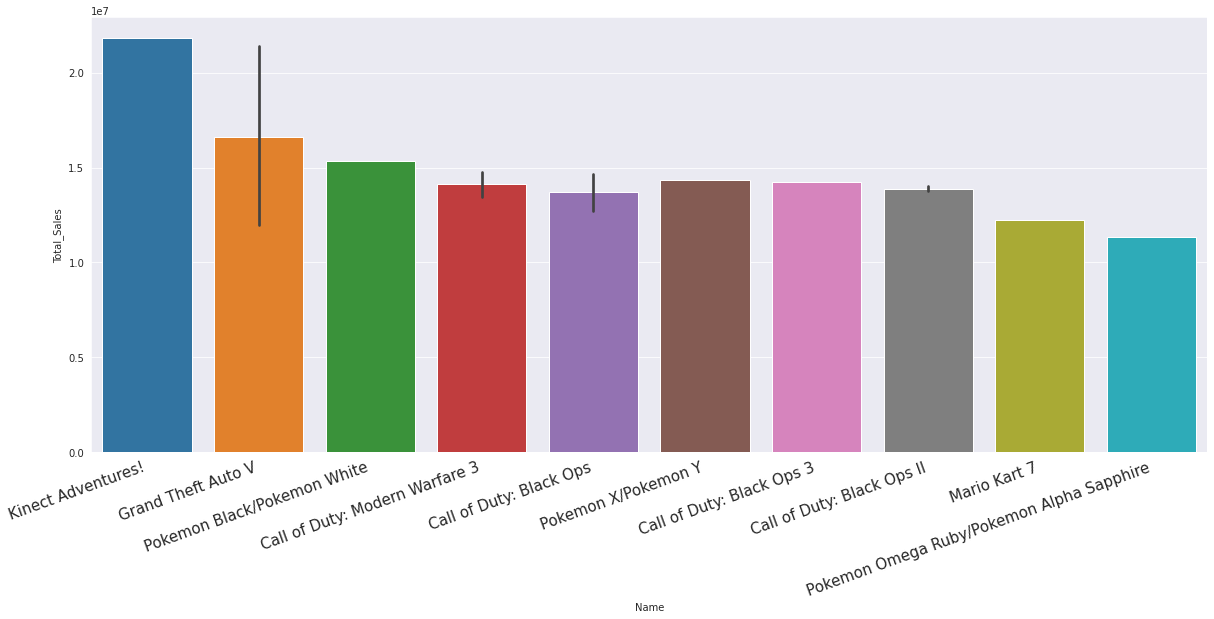

In [ ]:
plt.figure(figsize=(20, 8))
sns.barplot(x=T5['Name'], y=T5['Total_Sales'])
plt.xticks(fontsize='15', rotation=20, ha='right')
plt.grid(axis='y')

In [ ]:
T5

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total_Sales
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,1.497e+07,4.94e+06,240000,1.67e+06,21820000.0
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01e+06,9.27e+06,970000,4.14e+06,21390000.0
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63e+06,5.31e+06,60000,1.38e+06,16380000.0
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57e+06,3.28e+06,5.65e+06,820000,15320000.0
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03e+06,4.28e+06,130000,1.32e+06,14760000.0
6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67e+06,3.73e+06,110000,1.13e+06,14640000.0
1971,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5.17e+06,4.05e+06,4.34e+06,790000,14350000.0
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77e+06,5.81e+06,350000,2.31e+06,14240000.0
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99e+06,5.88e+06,650000,2.52e+06,14040000.0
6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25e+06,4.3e+06,70000,1.12e+06,13740000.0


In [ ]:
T5 = T5.groupby('Name').sum().reset_index()

In [ ]:
T5 = T5.sort_values(['Total_Sales'], ascending=[False])

In [ ]:
T5

,Name,Year,Total_Sales
4,Grand Theft Auto V,6040,49760000.0
3,Call of Duty: Modern Warfare 3,4022,28230000.0
2,Call of Duty: Black Ops II,4024,27780000.0
0,Call of Duty: Black Ops,4020,27370000.0
5,Kinect Adventures!,2010,21820000.0
7,Pokemon Black/Pokemon White,2010,15320000.0
9,Pokemon X/Pokemon Y,2013,14350000.0
1,Call of Duty: Black Ops 3,2015,14240000.0
6,Mario Kart 7,2011,12210000.0
8,Pokemon Omega Ruby/Pokemon Alpha Sapphire,2014,11330000.0


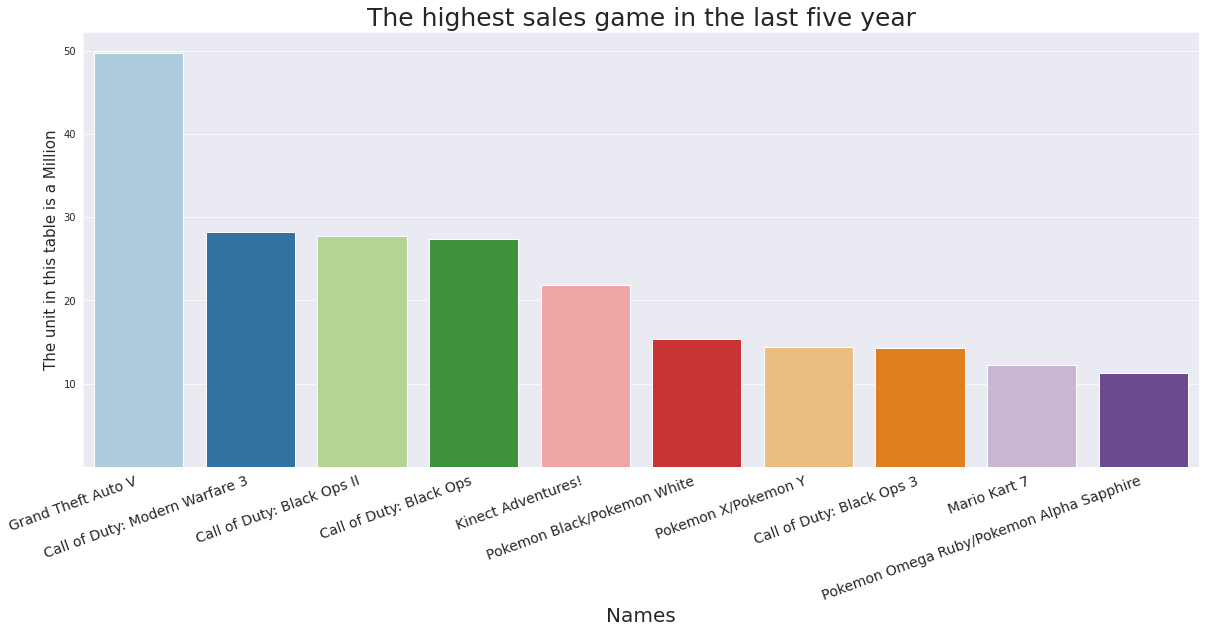

In [ ]:
plt.figure(figsize=(20, 8))
plt.title('The highest sales game in the last five year', fontsize='25')
sns.barplot(x=T5['Name'], y=T5['Total_Sales'],
            palette="Paired")
plt.xticks(fontsize='14', rotation=20, ha='right')
plt.yticks([10000000, 20000000, 30000000, 40000000, 50000000], 
           ['10', '20', '30', '40', '50'], fontsize='10')
plt.xlabel('Names', size='20')
plt.ylabel('The unit in this table is a Million', size='15')
plt.grid(axis='y')

In [ ]:
sales_10.sort_values([cols[0]], ascending=[False])[:10]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total_Sales
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,1.497e+07,4.94e+06,240000,1.67e+06,21820000.0
6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67e+06,3.73e+06,110000,1.13e+06,14640000.0
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63e+06,5.31e+06,60000,1.38e+06,16380000.0
2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03e+06,4.28e+06,130000,1.32e+06,14760000.0
6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25e+06,4.3e+06,70000,1.12e+06,13740000.0
12600,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7.03e+06,1.98e+06,80000,780000,9870000.0
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01e+06,9.27e+06,970000,4.14e+06,21390000.0
5604,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6.72e+06,2.63e+06,40000,820000,10210000.0
14576,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6.63e+06,2.36e+06,40000,730000,9760000.0
223,Just Dance 3,Wii,2011,Misc,Ubisoft,6.05e+06,3.15e+06,0,1.07e+06,10270000.0


In [ ]:
sales_10.sort_values([cols[1]], ascending=[False])[:10]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total_Sales
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01e+06,9.27e+06,970000,4.14e+06,21390000.0
2639,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11e+06,6.06e+06,60000,1.26e+06,8490000.0
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99e+06,5.88e+06,650000,2.52e+06,14040000.0
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54e+06,5.82e+06,490000,1.62e+06,13470000.0
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.8e+06,5.81e+06,360000,2.02e+06,11990000.0
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77e+06,5.81e+06,350000,2.31e+06,14240000.0
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63e+06,5.31e+06,60000,1.38e+06,16380000.0
9035,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06e+06,5.05e+06,130000,2.01e+06,8250000.0
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,1.497e+07,4.94e+06,240000,1.67e+06,21820000.0
6216,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96e+06,4.88e+06,810000,2.12e+06,10770000.0


In [ ]:
sales_10.sort_values([cols[2]], ascending=[False])[:10]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total_Sales
10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57e+06,3.28e+06,5.65e+06,820000,15320000.0
1847,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0,0,4.87e+06,0,4870000.0
8906,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2.01e+06,2.32e+06,4.36e+06,410000,9100000.0
1971,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5.17e+06,4.05e+06,4.34e+06,790000,14350000.0
15674,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0,0,3.44e+06,0,3440000.0
12966,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,30000,0,3.18e+06,0,3210000.0
15678,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2.91e+06,1.86e+06,3.14e+06,430000,8340000.0
4251,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4.23e+06,3.37e+06,3.08e+06,650000,11330000.0
10892,Monster Hunter X,3DS,2015,Action,Capcom,250000,190000,2.78e+06,40000,3260000.0
5147,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,Level 5,0,0,2.68e+06,0,2680000.0


In [ ]:
sales_10.sort_values([cols[3]], ascending=[False])[:10]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Total_Sales
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01e+06,9.27e+06,970000,4.14e+06,21390000.0
4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99e+06,5.88e+06,650000,2.52e+06,14040000.0
9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77e+06,5.81e+06,350000,2.31e+06,14240000.0
6216,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96e+06,4.88e+06,810000,2.12e+06,10770000.0
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.8e+06,5.81e+06,360000,2.02e+06,11990000.0
9035,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06e+06,5.05e+06,130000,2.01e+06,8250000.0
9924,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98e+06,4.44e+06,480000,1.83e+06,12730000.0
2723,FIFA 14,PS3,2013,Sports,Electronic Arts,780000,4.32e+06,70000,1.73e+06,6900000.0
4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,1.497e+07,4.94e+06,240000,1.67e+06,21820000.0
14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54e+06,5.82e+06,490000,1.62e+06,13470000.0


# 전체 게임의 발매량

In [ ]:
counting = raw_df.groupby('Year').count()

In [ ]:
counting = counting.drop(index=70)

In [ ]:
counting = counting.reset_index(drop=False)

No handles with labels found to put in legend.


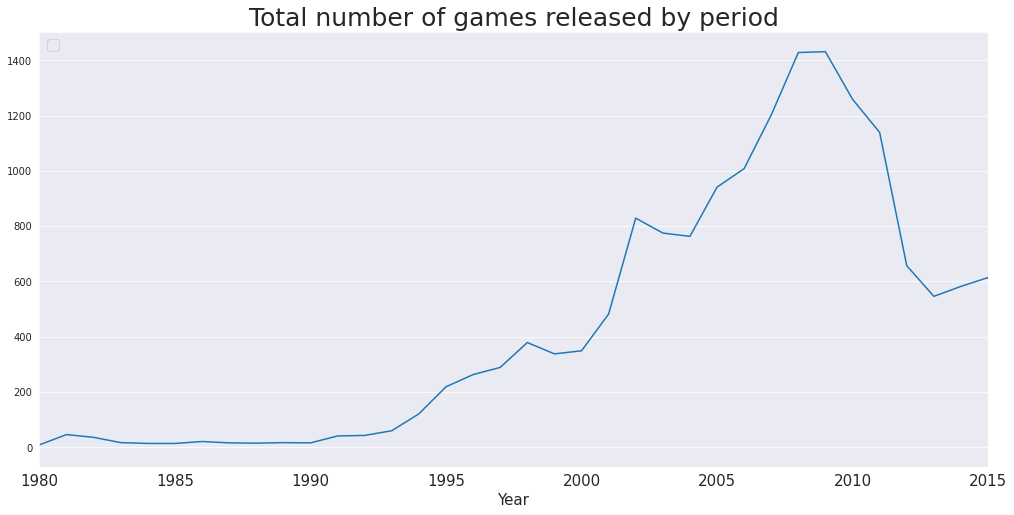

In [ ]:
plt.figure(figsize=(17, 8))
sns.set_style("dark")
plt.title('Total number of games released by period', fontsize='25')
sns.color_palette("Paired")
sns.lineplot(x=counting['Year'], y=counting['Name'],
             ci=None, palette="Paired")

plt.xticks(fontsize='15')
plt.xlabel('Year', size='15')
plt.ylabel(None)
plt.xlim(1980, 2015)
plt.legend(loc=2, fontsize='15')
plt.grid(axis='y')

# 전체 게임의 판매량



In [ ]:
total_sales = sales.groupby('Year').sum()

In [ ]:
total_sales = total_sales.drop(index=70)

In [ ]:
total_sales = total_sales.reset_index(drop=False)

In [ ]:
total_sales.sort_values(['Total_Sales'], ascending=[False])[:10]

,Year,Total_Sales
28,2008,678490000.0
29,2009,667100000.0
27,2007,610440000.0
30,2010,600360000.0
26,2006,520520000.0
31,2011,515930000.0
25,2005,459410000.0
24,2004,418850000.0
22,2002,394970000.0
33,2013,367980000.0


No handles with labels found to put in legend.


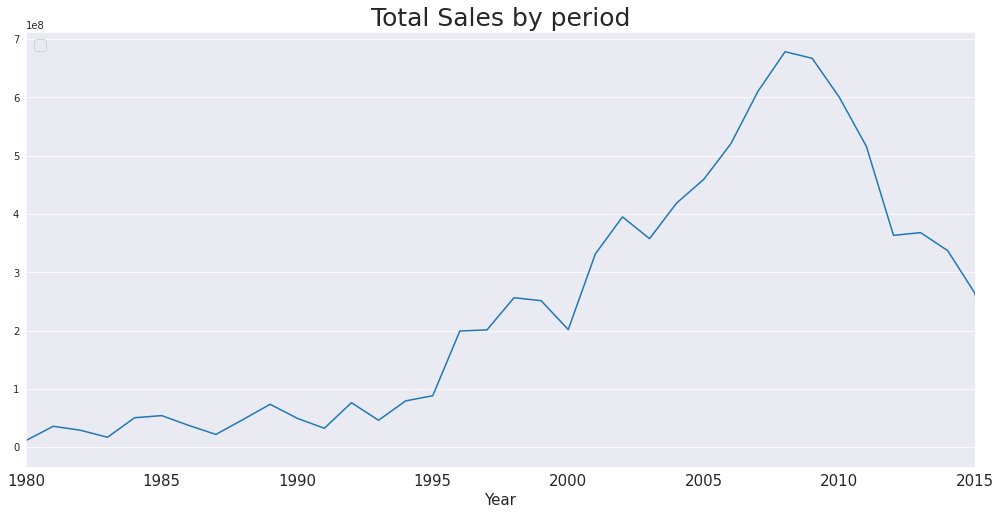

In [ ]:
plt.figure(figsize=(17, 8))
sns.set_style("dark")
plt.title('Total Sales by period', fontsize='25')
sns.color_palette("Paired")
sns.lineplot(x=total_sales['Year'], y=total_sales['Total_Sales'],
             ci=None, palette="Paired")

plt.xticks(fontsize='15')
plt.xlabel('Year', size='15')
plt.ylabel(None)
plt.xlim(1980, 2015)
plt.legend(loc=2, fontsize='15')
plt.grid(axis='y')

# 발매량과 판매량

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

stsc = pd.concat([total_sales['Total_Sales'], counting['Name']], axis=1)

In [ ]:
stsc = scaler.fit_transform(stsc)

In [ ]:
stsc = pd.DataFrame(stsc)

In [ ]:
stsc = pd.concat([counting['Year'], stsc], axis=1)

In [ ]:
stsc = stsc.rename(columns={0 : 'Sales', 1 : 'Count'})

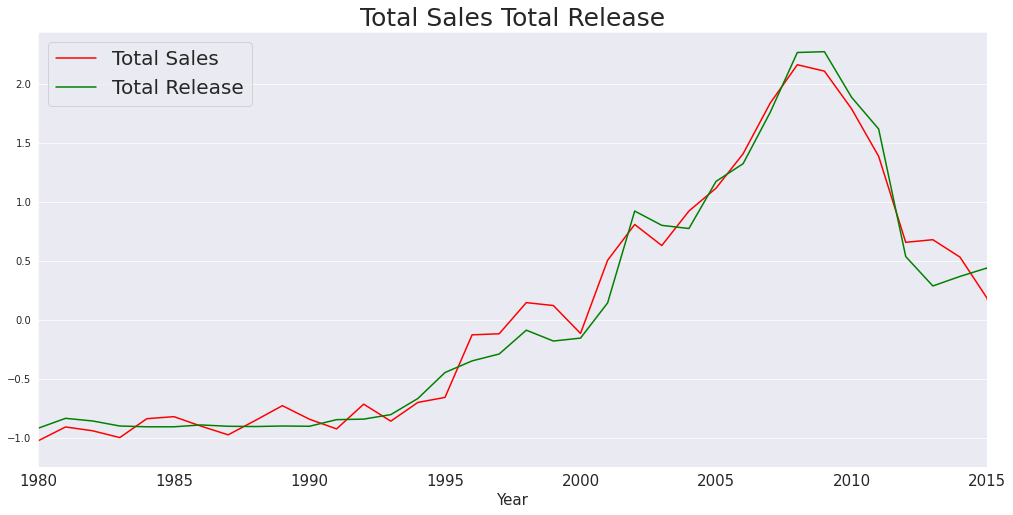

In [ ]:
plt.figure(figsize=(17, 8))
sns.set_style("dark")
plt.title('Total Sales Total Release', fontsize='25')
sns.color_palette("Paired")
plt.plot(stsc['Year'], stsc['Sales'], color='red', label='Total Sales')
plt.plot(stsc['Year'], stsc['Count'], color='green', label='Total Release')
plt.xticks(fontsize='15')
plt.xlabel('Year', size='15')
plt.ylabel(None)
plt.xlim(1980, 2015)
plt.legend(loc=2, fontsize='20')
plt.grid(axis='y')